# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

In [2]:
# --- SETUP DEL NOTEBOOK (ejecutar primero) ---

# Silenciar warnings
import warnings; warnings.filterwarnings("ignore")

# Imports base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

# Carga de datos (ajusta la ruta si moviste el CSV)
df = pd.read_csv("./data/retailmax.csv")   # nombres de columnas: 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'

# Asegurar tipos numéricos en columnas usadas
num_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Columnas auxiliares que usan varias preguntas
age_bins    = [0, 20, 30, 40, 50, 60, 120]
age_labels  = ["<20", "21-30", "31-40", "41-50", "51-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

inc_bins    = [0, 30, 60, 90, 200]         # k$
inc_labels  = ["<30k", "31-60k", "61-90k", "90k+"]
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=inc_bins, labels=inc_labels, right=False)

# Chequeo rápido
print(df.shape)
display(df.head())


(200, 7)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeGroup
0,1,Male,19,15,39,<20,<30k
1,2,Male,21,15,81,21-30,<30k
2,3,Female,20,16,6,21-30,<30k
3,4,Female,23,16,77,21-30,<30k
4,5,Female,31,17,40,31-40,<30k


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

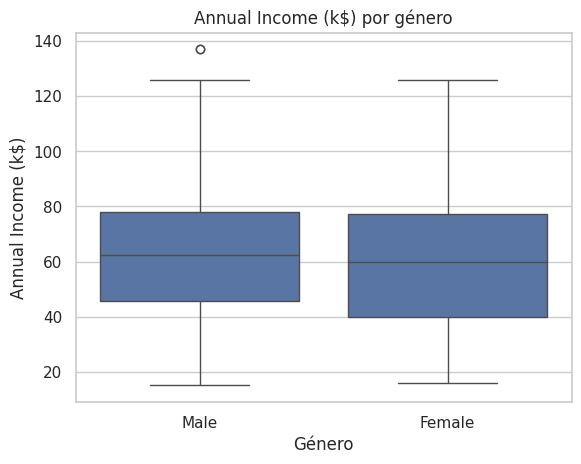

In [3]:
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.title("Annual Income (k$) por género")
plt.xlabel("Género")
plt.ylabel("Annual Income (k$)")
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

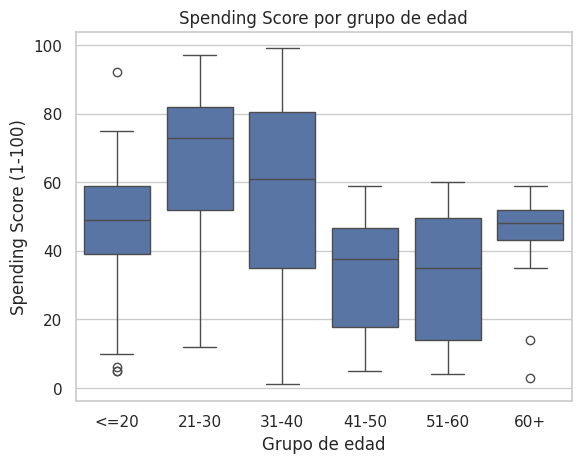

In [4]:
# Creamos grupos de edad (ajusta cortes si quieres)
bins = [0, 20, 30, 40, 50, 60, 120]
labels = ["<=20","21-30","31-40","41-50","51-60","60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

sns.boxplot(x="AgeGroup", y="Spending Score (1-100)", data=df, order=labels)
plt.title("Spending Score por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

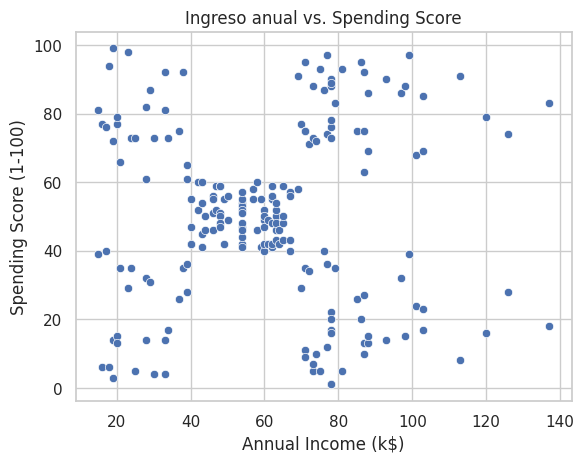

Coeficiente de correlación (Pearson): 0.010


In [5]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Ingreso anual vs. Spending Score")
plt.show()

corr = df["Annual Income (k$)"].corr(df["Spending Score (1-100)"])
print(f"Coeficiente de correlación (Pearson): {corr:.3f}")

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

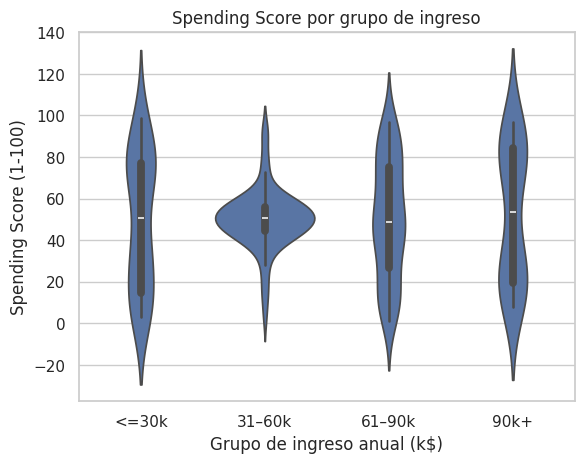

In [6]:
# Discretizamos ingreso anual
inc_bins = [0, 30, 60, 90, 200]
inc_labels = ["<=30k", "31–60k", "61–90k", "90k+"]
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=inc_bins, labels=inc_labels, right=True)

sns.violinplot(x="IncomeGroup", y="Spending Score (1-100)", data=df, order=inc_labels, inner="box")
plt.title("Spending Score por grupo de ingreso")
plt.xlabel("Grupo de ingreso anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

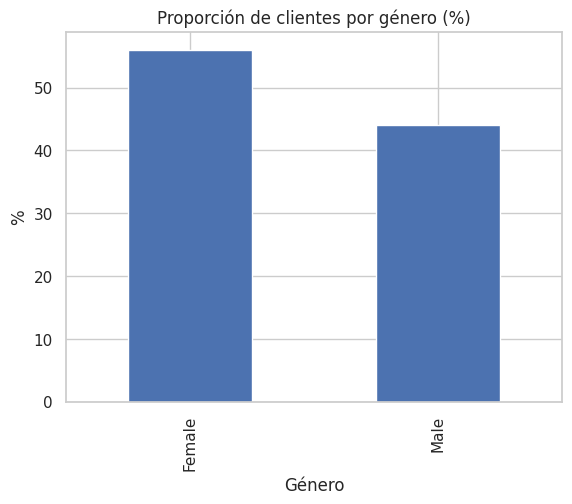

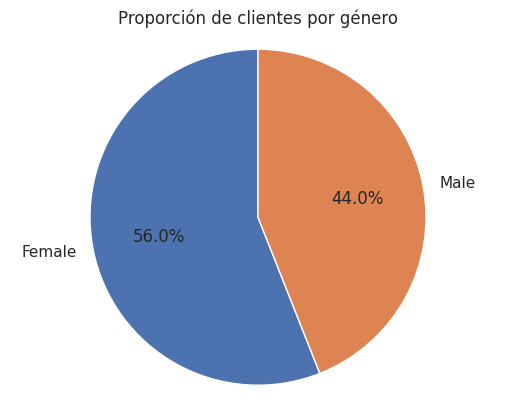

In [7]:
ax = (df["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("Porcentaje")
      .plot(kind="bar"))
plt.title("Proporción de clientes por género (%)")
plt.ylabel("%")
plt.xlabel("Género")
plt.show()

plt.pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("Proporción de clientes por género")
plt.axis("equal")
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

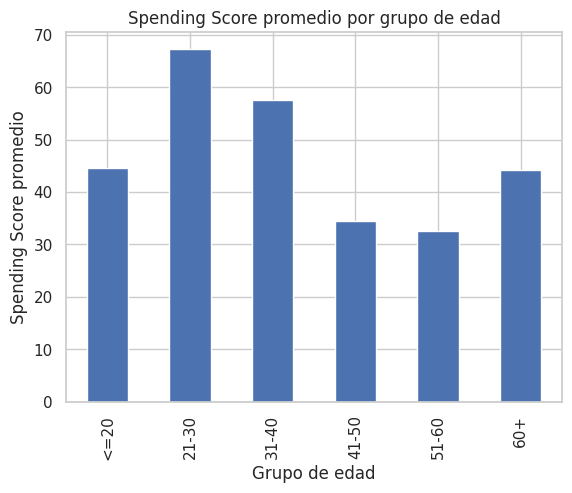

AgeGroup
<=20     44.647059
21-30    67.222222
31-40    57.500000
41-50    34.394737
51-60    32.521739
60+      44.176471
Name: Spending Score (1-100), dtype: float64

In [8]:
avg_spend_by_agegroup = (df.groupby("AgeGroup")["Spending Score (1-100)"]
                           .mean()
                           .reindex(labels))
avg_spend_by_agegroup.plot(kind="bar")
plt.title("Spending Score promedio por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Spending Score promedio")
plt.show()

avg_spend_by_agegroup

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

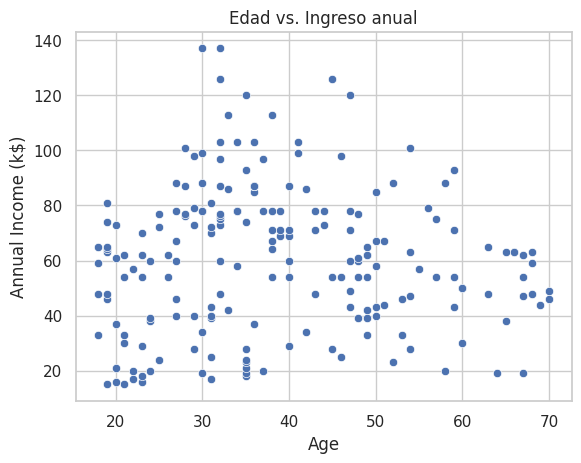

Correlación Age ~ Income: -0.012398042736060145


In [9]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)
plt.title("Edad vs. Ingreso anual")
plt.show()

print("Correlación Age ~ Income:", df["Age"].corr(df["Annual Income (k$)"]))

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

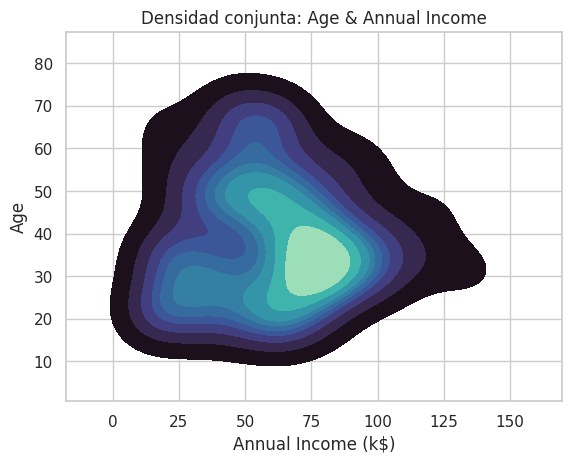

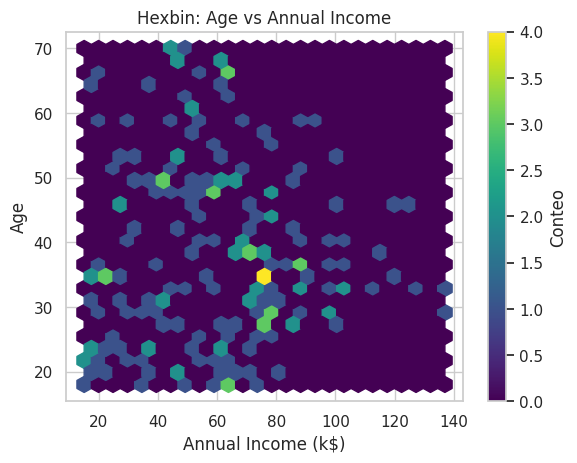

In [10]:
# Opción 1: scatter con densidad (kde)
sns.kdeplot(x=df["Annual Income (k$)"], y=df["Age"], fill=True, cmap="mako", thresh=0.05)
plt.title("Densidad conjunta: Age & Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.show()

# Opción 2: hexbin (matplotlib puro)
plt.hexbin(df["Annual Income (k$)"], df["Age"], gridsize=25, cmap="viridis")
plt.colorbar(label="Conteo")
plt.title("Hexbin: Age vs Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

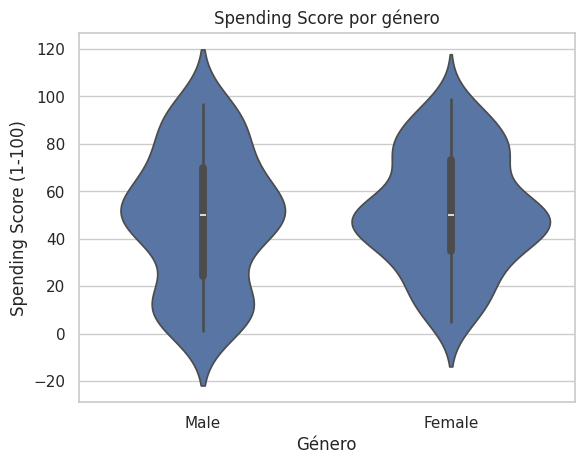

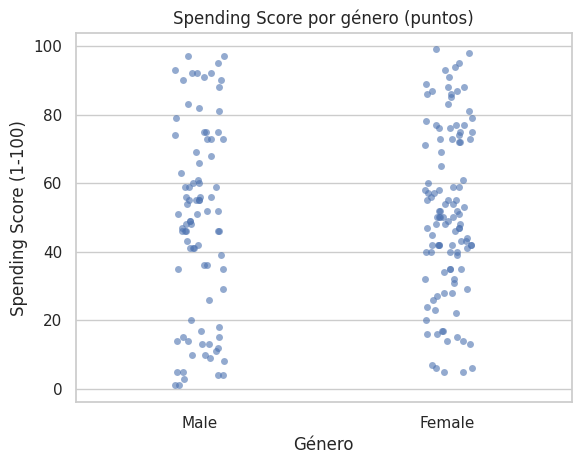

In [11]:
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=df, inner="box")
plt.title("Spending Score por género")
plt.xlabel("Género")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Alternativa: scatter con jitter
sns.stripplot(x="Gender", y="Spending Score (1-100)", data=df, jitter=True, alpha=0.6)
plt.title("Spending Score por género (puntos)")
plt.xlabel("Género")
plt.ylabel("Spending Score (1-100)")
plt.show()